## Day 83 Lecture 2 Assignment

In this assignment, we will learn about Spark and MLLib.




Update the Google Compute Engine.

In [1]:
! apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/lin

Run the cells below to start a spark session.

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz

Set up the environmental variables.

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

Install Pyspark. ***Note: The version must match the version of Spark that you have installed earlier***.

In [4]:
!pip install -q findspark
!pip install pyspark==2.4.6

     |████████████████████████████████| 218.4MB 62kB/s 
     |████████████████████████████████| 204kB 42.1MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814406 sha256=3f7c6053d70b4ada539d719738ca0d9477de1705fced42306ba791e0514c1660
  Stored in directory: /root/.cache/pip/wheels/1e/5e/6a/17e906c94ec7246f260330a66e44a06a0809033ba2738a74a8
Successfully built pyspark


Download and save the video games sales CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Big%20Data/Video_Games_Sales_as_at_22_Dec_2016.csv), download it and save it to your Google Colab Data folder on gdrive.


Mount your Google drive for access in Google Colab Notebooks.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Change your directory to the Colab Data folder where you saved the CSV file.

In [6]:
os.chdir('/content/gdrive/MyDrive/')

Set your local session.

In [10]:
APP_NAME = "Day83"
SPARK_URL = "local[*]"

Run the cells below to start a spark session.

In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

List all the files in your directory.

In [8]:
os.listdir()

['Colab Notebooks',
 'Central Limit Theorem Assignment.ipynb',
 'Thinkful',
 'Capstone 1',
 'Challenge: Factors that affect life expectancy.ipynb',
 '3dmark_fs_P_1339_1 (2).csv',
 '3dmark_fs_P_1339_2 (2).csv',
 '3dmark_fs_P_1339_3 (2).csv',
 '3dmark_fs_P_1339_4.csv',
 '3dmark_fs_P_1339_5.csv',
 '3dmark_fs_P_1339_6.csv',
 '3dmark_fs_P_1339_7.csv',
 'Capstone 2 - Supervised Learning',
 'Job & Activity Tracker.gsheet',
 '3dmark_fs_P_1339_1 (1).csv',
 '3dmark_fs_P_1339_2 (1).csv',
 '3dmark_fs_P_1339_3 (1).csv',
 '3dmark_fs_P_1339_1.csv',
 '3dmark_fs_P_1339_2.csv',
 '3dmark_fs_P_1339_3.csv',
 '3dmark_scraper',
 'Joy',
 'Role Interview Planner.gdoc',
 'Finding Open Positions and Analyzing Fit .gdoc',
 'combined.csv',
 'Capstone 3 - Unsupervised Learning',
 'M31C3 - Text Preprocessing.ipynb',
 'Day 75, Lecture 1: Assignment_Caesar.ipynb',
 'Copy of Day 75, Lecture 2: Assignment.ipynb',
 'dogs-vs-cats-processed',
 'UCI HAR Dataset',
 'M33C4_Working_with_Dask_Arrays.ipynb',
 'Video_Games_Sales_

Load the CSV file as a Spark dataframe.

In [12]:
video = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("Video_Games_Sales_as_at_22_Dec_2016.csv")

Review the data by applying the show command.

In [13]:
video.show(10)

+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|                Name|Platform|Year_of_Release|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|Developer|Rating|
+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|          Wii Sports|     Wii|           2006|      Sports| Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322| Nintendo|     E|
|   Super Mario Bros.|     NES|           1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|        null|        null|      null|      null|     null|  null|
|      Mario Kart Wii|     Wii|           2008|      Racing|

We will predict global sales using a number of variables in this dataset. We will start by removing all missing data (though we know that this will make the dataset significantly smaller). Drop all the missing values using dropna.

In [19]:
video_ = video.na.drop()
video_.show()

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|           Developer|Rating|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322|            Nintendo|     E|
|      Mario Kart Wii|     Wii|           2008|  Racing|            Nintendo|   15.68|   12.76|    3.79|       3.29|       35.52|          82|          73|       8.3|       709

Get the unique values for Genre.


In [20]:
distinct_g = [x.Genre for x in video_.select('Genre').distinct().collect()]
len(distinct_g)

12

In [21]:
distinct_g

['Adventure',
 'Sports',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Misc',
 'Platform',
 'Puzzle',
 'Fighting',
 'Action',
 'Strategy',
 'Simulation']

Next, we will create dummy variables for the genre. Create these variables using the `OneHotEncoder` provided in spark.

In [22]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer = StringIndexer(inputCol="Genre", outputCol="GenreIndex")
si = stringIndexer.fit(video_)
indexed = si.transform(video_)
encoder = OneHotEncoder(inputCol="GenreIndex", outputCol="GenreVec")
encoded = encoder.transform(indexed)

In [23]:
encoded.show()

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|           Developer|Rating|GenreIndex|      GenreVec|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322|            Nintendo|     E|       1.0|(11,[1],[1.0])|
|      Mario Kart Wii|     Wii|           2008|  Racing|            Nint

Convert the critic score and the user score to a number between 0 and 1 by dividing by 100. 

In [26]:
from pyspark.sql.functions import lit, col

video_percent = encoded.withColumn("Critic_Score_100", encoded["Critic_Score"]/lit(100)).withColumn("User_Score_100", encoded["User_Score"]/lit(100))

video_percent.show()

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+----------------+-------------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|           Developer|Rating|GenreIndex|      GenreVec|Critic_Score_100|     User_Score_100|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+----------------+-------------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322|            Nint

Using the vector assembler, create a vector of features using the scaled user score, the scaled critic score and the one hot encoded vector.

In [106]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

feature_cols = [x for x in video_percent.columns if x in ['GenreVec', 'Critic_Score_100', 'User_Score_100']]
print(feature_cols)
assembler = VectorAssembler(
    inputCols = feature_cols,
    outputCol = 'features'
)

video_percent_ = assembler.transform(video_percent)

['GenreVec', 'Critic_Score_100', 'User_Score_100']


In [28]:
video_percent_.show(10)

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+-------------------+------+----------+--------------+----------------+-------------------+--------------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|          Developer|Rating|GenreIndex|      GenreVec|Critic_Score_100|     User_Score_100|            features|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+-------------------+------+----------+--------------+----------------+-------------------+--------------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|    

Split the data into 70% in the training sample and 30% in the test sample.

In [32]:
sel = video_percent_.select("features", "Global_Sales")

In [33]:
train, test = sel.randomSplit([0.7, 0.3], seed = 117)

## Linear Regression

Using the train and test data, generate a linear regression to predict global sales. Print the r squared from the model summary.

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol='Global_Sales')
lrModel = lr.fit(train)

In [35]:
print(f"R^2 Test Score: {lrModel.summary.r2}")

R^2 Test Score: 0.062260613874637105


Calculate the RMSE

In [45]:
print(f"RMSE: {lrModel.summary.rootMeanSquaredError}")

Accuracy: 1.988425243580145


## Classification - Binomial Logistic Regression

Download and save the college admission  CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv), download it and save it to your Google Colab Data folder on gdrive.

Load the admit CSV file in to the spark instance.

In [48]:
# Answer below:
admit = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/content/gdrive/MyDrive/Thinkful/Datasets/Admission_Predict.csv")
admit.show()

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|         6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|         7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|         8|      308|        101|                2|3.0| 4.0| 7.9|    

In [49]:
admit.printSchema()

root
 |-- Serial No.: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



Create a categorical response from `Chance of Admit` column.

In [55]:
from pyspark.ml.feature import Binarizer

binarizer = Binarizer(threshold=0.5, inputCol='Chance of Admit ', outputCol='Chance of Admit_binarized')
binarized_admit = binarizer.transform(admit)

In [56]:
binarized_admit.show(10)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |Chance of Admit_binarized|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                      1.0|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                      1.0|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|                      1.0|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|                      1.0|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|                      1.0|
|         6|      330|        115|              

Divide GRE and TOEFL score columns by 100 to normalize the features.

In [57]:
from pyspark.sql.functions import lit, col

binarized_admit = binarized_admit.withColumn("GRE_100", binarized_admit["GRE Score"]/lit(100)).withColumn("TOEFL_100", binarized_admit["TOEFL Score"]/lit(100))
binarized_admit.show(10)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |Chance of Admit_binarized|GRE_100|TOEFL_100|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                      1.0|   3.37|     1.18|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                      1.0|   3.24|     1.07|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|                      1.0|   3.16|     1.04|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|                      1.0|   3.22|      1.1|
|         5|      314|        103|       

Vectorize the features using the vector assembler, saving them into a column named features.

In [97]:
from pyspark.ml.feature import VectorAssembler

feature_cols = [x for x in binarized_admit.columns if x in ['GRE_100', 'TOEFL_100']]
print(feature_cols)
assembler = VectorAssembler(
    inputCols = feature_cols,
    outputCol = 'features'
)

admit_features = assembler.transform(binarized_admit)

['GRE_100', 'TOEFL_100']


In [98]:
admit_features.show(10)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+-----------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |Chance of Admit_binarized|GRE_100|TOEFL_100|   features|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+-----------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                      1.0|   3.37|     1.18|[3.37,1.18]|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                      1.0|   3.24|     1.07|[3.24,1.07]|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|                      1.0|   3.16|     1.04|[3.16,1.04]|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|              

Split into train and test subsets.

In [99]:
train, test = admit_features.randomSplit([0.7, 0.3], seed=117)

Define the Logistic regression model.

In [100]:
from pyspark.ml.classification import LogisticRegression
logr = LogisticRegression(featuresCol = 'features', labelCol='Chance of Admit_binarized')

Fit the model.

In [101]:
logrModel = logr.fit(train)

predict in the test set.

In [102]:
predictions = logrModel.transform(test)

In [103]:
predictions.show(5)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+-----------+--------------------+--------------------+----------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |Chance of Admit_binarized|GRE_100|TOEFL_100|   features|       rawPrediction|         probability|prediction|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+-------------------------+-------+---------+-----------+--------------------+--------------------+----------+
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                      1.0|   3.24|     1.07|[3.24,1.07]|[-5.0179114831498...|[0.00657482042606...|       1.0|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|                      1.0|   3.22|      1.1| [3.22,1.1]|[-5.8451849314367...|[0.00288544959608...|  

Plot the ROC.

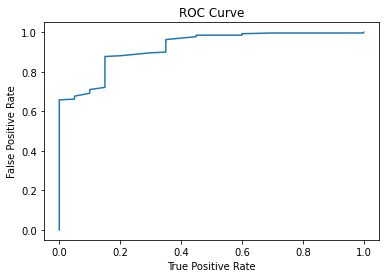

Training Set areaUnderROC: 0.9237918215613383


In [104]:
import matplotlib.pyplot as plt

trainingSummary = logrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training Set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Calculate the overall model accuracy using the model evaluator.


In [105]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

eval = MulticlassClassificationEvaluator(labelCol='Chance of Admit_binarized', predictionCol='prediction', metricName='accuracy')
accuracy = eval.evaluate(predictions)
print("Test Accuracy - %g" % (accuracy))

Test Accuracy - 0.873874


## Classification - Random Forest

Download and save the land cover type CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Big%20Data/covtype.csv), download it and save it to your Google Colab Data folder on gdrive.

Load the land cover type data from this CSV file.

In [79]:
land = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load('/content/gdrive/MyDrive/Thinkful/Datasets/covtype.csv')
land.show()

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilderness_Area3|Wi

In [80]:
#load modules
# !!!!caution: not from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString,StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Vectorize the features to a single column called features using a lambda function.

In [109]:
feature_cols =  [x for x in land.columns if x not in 'Cover_Type']
assembler = VectorAssembler(inputCols = feature_cols, outputCol='features')
#func = (lambda row:(row['features'] = )
land_features = assembler.transform(land)

In [110]:
# Split the data into training and test sets (40% held out for testing)
train, test = land_features.randomSplit([0.6, 0.4], seed=117)

In [111]:
land_features.show(5)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+--------------------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area

In [113]:
from pyspark.ml.classification import RandomForestClassifier

# Define a RandomForest model.
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Cover_Type')
rfModel = rf.fit(train)

Fit the model and predict on the test data.

In [114]:
#Answer below:
predictions = rfModel.transform(test)
predictions.show(10)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+--------------------+--------------------+--------------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Dis

Build a classification matrix to review the model preformance with the data test set.

In [142]:
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType
from pyspark.mllib.evaluation import MulticlassMetrics

valAndPreds = predictions.select(['prediction', 'Cover_Type']).withColumn('label', F.col('Cover_Type').cast(FloatType())).orderBy('prediction')
valAndPreds = valAndPreds.select(['prediction', 'label'])
metrics = MulticlassMetrics(valAndPreds.rdd.map(tuple))

In [149]:
# without using sklearn.metrics (because it's easier)
metrics.confusionMatrix().toArray()

array([[6.1693e+04, 2.3151e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [2.6253e+04, 8.6038e+04, 9.6900e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [0.0000e+00, 4.8230e+03, 9.4610e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.6000e+01, 1.0800e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.8400e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [0.0000e+00, 2.9840e+03, 3.9170e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [8.1280e+03, 3.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00]])

Too janky. I don't know what visual cleanup can be done but this is not good.

In [150]:
valAndPreds.select('prediction')

DataFrame[prediction: double]

In [152]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(valAndPreds.select('label').collect(), valAndPreds.select('prediction').collect()))

[[61693 23151     0     0     0     0     0]
 [26253 86038   969     0     0     0     0]
 [    0  4823  9461     0     0     0     0]
 [    0    36  1080     0     0     0     0]
 [    0  3840     0     0     0     0     0]
 [    0  2984  3917     0     0     0     0]
 [ 8128    31     0     0     0     0     0]]
